In [1]:
#Data analysis on IRIS dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset
dataset = pd.read_csv("Iris.csv")

In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Drop Id column
dataset.drop(['Id'], axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


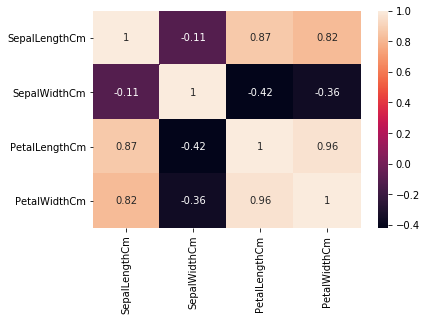

In [5]:
#EDA
dataset.groupby('Species').count()
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [6]:
#Train and test set
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [7]:
# Splitting the dataset into the Training set and Test set - 120 train and 30 test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [10]:
classifier_log = LogisticRegression(random_state=0)
classifier_log.fit(X_train, y_train)
y_pred_log = classifier_log.predict(X_test)

In [11]:
cm_log = confusion_matrix(y_test, y_pred_log)
prediction = list(y_pred_log)
actual = list(y_test)

In [12]:
# K-NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

y_pred_knn = classifier_knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)

In [13]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
classifier_svm = SVC(kernel='linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

y_pred_svm = classifier_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [14]:
#KERNEL SVM
from sklearn.svm import SVC
classifier_kernel_svm = SVC(kernel='rbf', random_state = 0)
classifier_kernel_svm.fit(X_train, y_train)

y_pred_kernel_svm = classifier_kernel_svm.predict(X_test)
cm_kernel_svm = confusion_matrix(y_test, y_pred_kernel_svm)

In [15]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

y_pred_nb = classifier_nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)

In [16]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
classifier_dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dec_tree.fit(X_train, y_train)

y_pred_dec_tree = classifier_dec_tree.predict(X_test)

cm_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)

In [17]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_forest.fit(X_train, y_train)

y_pred_forest = classifier_forest.predict(X_test)

cm_forest = confusion_matrix(y_test, y_pred_forest)

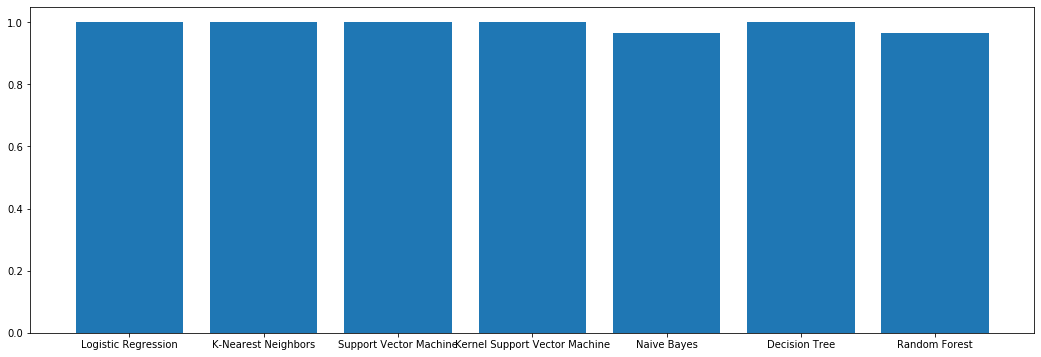

In [21]:
from sklearn.metrics import accuracy_score
accuracy_list =[]
accuracy_list.append(accuracy_score(y_test,  y_pred_log))
accuracy_list.append(accuracy_score(y_test,  y_pred_knn))
accuracy_list.append(accuracy_score(y_test,  y_pred_svm))
accuracy_list.append(accuracy_score(y_test,  y_pred_kernel_svm))
accuracy_list.append(accuracy_score(y_test,  y_pred_nb))
accuracy_list.append(accuracy_score(y_test,  y_pred_dec_tree))
accuracy_list.append(accuracy_score(y_test,  y_pred_forest))

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Kernel Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(18,6))
plt.bar(models, accuracy_list)
plt.show()
